In [1]:
from IPython.display import HTML

def yt(url, width=500, height=None):
    """
    Function to embed a youtube movie in a notebook
    """
    
    if height is None:
        height = (9/16*width)
    
    url = url.replace("youtu.be", 'youtube.com/embed')
    
    embed_code = """
    <iframe
        width="{0}"
        height="{1}"
        src="{2}"
        frameborder="0"
        allowfullscreen>
    </iframe>
    """.format(width, height, url)
    
    return HTML(embed_code)

# Topic 06 - Deep Learning

Deep learning is the particular AI technique that will power our self-driving car.

# Introduction

This is just a basic machine learning algorithm. However, if we manage to understand this thoroughly, it offers a straight path to understand, at least conceptually, deep learning. Deep learning models can get quite complex, but this complexity is mainly a consequence of their composite nature. The fundamental building block is actually rather simple, and logistic regression offers a good opportunity to understand these fundamentals.

In [34]:
# imports

import numpy as np # as always
import matplotlib.pyplot as plt
import cv2

import os
from os.path import dirname


%matplotlib inline

In [51]:
redo_preprocessing = True

# dirstuff
this_dir = os.getcwd()
root_dir = dirname(this_dir)
data_dir = os.path.join(root_dir, 'resc', 'data', 'step-01', 'cats-vs-cars')
train_dir, test_dir = os.path.join(data_dir, 'train'), os.path.join(data_dir, 'test')

pp_dir = os.path.join(root_dir, 'resc', 'data', 'step-02')

# get filenames
fns_train = [os.path.join(train_dir, f) for f in os.listdir(train_dir)]
fns_test = [os.path.join(test_dir, f) for f in os.listdir(test_dir)]

fns_train.sort()
fns_test.sort()

train_array_fn = os.path.join(pp_dir, 'train.npy')
test_array_fn = os.path.join(pp_dir, 'test.npy')

# label data
labels_train = np.array([fn.find('car-')>0 for fn in fns_train], dtype=int)
labels_test = np.array([fn.find('car-')>0 for fn in fns_test], dtype=int)

# Preprocess
if redo_preprocessing:
    nb_pix = 64
    nb_channels = 3

    train = np.zeros((len(fns_train), nb_pix, nb_pix, nb_channels))
    test = np.zeros((len(fns_test), nb_pix, nb_pix, nb_channels))

    for idx, fn in enumerate(fns_train):
        img = cv2.imread(fn)
        img = img/255.
        res = cv2.resize(img, dsize=(64, 64))
        res = res[:,:,[2,1,0]]

        train[idx, :, :, :] = res 

    for idx, fn in enumerate(fns_test):
        img = cv2.imread(fn)
        img = img/255.
        res = cv2.resize(img, dsize=(64, 64))
        res = res[:,:,[2,1,0]]

        test[idx, :, :, :] = res 

    np.save(train_array_fn, train)
    np.save(test_array_fn, test)

In [52]:
train_set_x_orig, train_set_y = np.load(train_array_fn), labels_train
test_set_x_orig, test_set_y = np.load(test_array_fn), labels_test


The label is: 0, so it's a cat



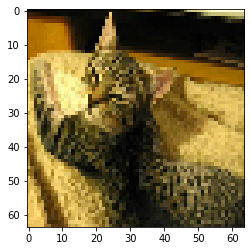

In [54]:
# Let us look at a single picture

# Example of a picture
index = 198
plt.imshow(train_set_x_orig[index])

msg = """
The label is: {}, so it's a {}
""".format(train_set_y[index], 'car' if train_set_y[index] else 'cat')
print(msg)

In [50]:
train_set_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Exercise

Make sure you understand how the preprocessing code above -more or less- works. Basically, using some libraries it takes `jpg` in and arrays out.

## Exercise

It is always important, especially when dealing with linear algebra based algorithms, to make sure you are well aware of the dimensionality of your problem.

Verify the dimensions of all your input data.

In [151]:
# code your solution here
nb_train = None
nb_test = None
dimension_of_image = None
nb_channels=None

# Message that prints our outputs. Make sure you understand how this works.
msg = """
The size of the training set:    {}
The size of the test set:        {}
The dimensions of the iamges:    {}
The number of channels:          {}
""".format(nb_train, nb_test, dimension_of_image, nb_channels)
print(msg) 


The size of the training set:    None
The size of the test set:        None
The dimensions of the iamges:    None
The number of channels:          None



## Exercise - Reshape

Reshape the input arrays. We don't want a tensor as input. We are just going to handle it as one big vector. That's inconvenient for us as humans, but our algorithm in this case would not care.

In [27]:
# code solution here.

train_set_x = np.zeros((2000))
train_set_y = np.zeros((2000))

test_set_x = np.zeros((2000))
test_set_y = np.zeros((2000))

# Building blocks of the algorithm

Our algorithm has a few parts.

1. We need to initialize all the datastructures.
2. Forward propagation
3. Compute the Loss function
4. Backward propagation

## Helper functions

### Exercise

Implement the sigmoid function. This converts any scaler into a value between 0 and 1.m

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

## Initialize

Initialize the weights and the bias parameters. This basically means constructing arrays of correct dimensionality.

In [157]:
def initialize_weights(input_dimension):
    """
    The weights are a vector (or matrix, depending how you look at it) with shape (input_dimension, 1)
    """
    w = None
    return w

def initialize_bias(input_dimension):
    w = None
    return w

## Forward propagation

The first step is to take inputs, and propagete them forward through your very tiny network, as to get a first try at the solution.

In [ ]:
def forward_propagation(w, b, X):
    m = Y.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)                 # compute activation
    
    return A

## Loss

$\mathcal{L}(O, O')$

Now we need to compute how much this deviates from what we actually wanted. For some funky mathematical reasons, we cannot simply take the difference, but we need something that is called the log-loss.

In [6]:
def compute_loss(A, Y):
    """
    Compute the log-loss function.
    """
    loss = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))# compute cost
    return np.squeeze(loss)

## Backward propagation

Now we know three things:
    - inputs
    - desired outputs
    - our outputs
    
Now, we are interested in how we need to change the parameters of our model in order to improve our performance. For this, we want to know how the loss function **changes** when we change the parameters.

We only have a single sample of the loss function, so we want to know how much the loss function changes at **one single point**. Notice the simalirity with our discussion of derivatives. 

If think back of motion, we first defined speed as the distance travelled over a certain time interval. In this case, we were interested in how the distance **changes** when we change the time. When we wanted to know this change at **one single moment in time**, we could not longer rely on these intervals. But, we solved that problem by making the interval super, super, super small. To be precise, we looked at;

$$
\text{lim}_{\Delta t \rightarrow 0} \frac{\Delta s(t)}{\Delta t} =  \frac{d}{dt} s(t)
$$

which we then started calling the **derivative of s**. Of course, the change of distance per time is just the **velocity**.

Now, the only thing to understand is that derivatives are more than a tool for calculating velocities. They quantify change. And moreover, they quantify change at single points, something that is impossible without this *limit-trick*! Now, in Machine Learning, we find ourselves in a situation where we literally need exactly that: *quantify the change of the cost function, when the parameters vary*. Hence, we shall use derivatives again!

If we know how the loss function changes with respect to the paramters, we can change the parameters to get a better model. How does this work? Simple! Again think of the distance-time-velocity example. The distance plays the role of the cost. The goal is to minimize the distance. There are three possible scenariosIf my velocity is positive, I know I am increasing the distance. 

In [2]:
def backward_propagation(A, X, Y):
    """
    This step could also simply be called differentation. But OK,
    in neural network land this is called backpropagation, or backprop.
    
    Just remember it is just derivation.
    """
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    return dw, db

## Putting it all together

Group your forward propagation, cost computation and backward propagation together in one easy function. 

In [7]:
def single_attempt_plus_what_to_try_next(w, b, X, Y):
    
    # Try our model
    A = forward_propagation(w, b, X)
    
    # See how well it did
    loss = compute_loss(A, Y)
    
    # Figure out how to improve
    dw, db = backward_propagation(A, X, Y)
    
    return dw, db, loss

## Improving the model

Of course, now we now all about the derivatives and how they can tell us where to go.

Once again, think of the analogy of the motion of a car. If the speed at time $t=t_0$ is negative, than we know that at a later time, let's call that $t=t_1$, we'll be closer to the origin, which is where we'd like to end up. And if the speed is positive, we should just do the reverse. The point is surprisingly simple; if you know the derivative, you something about the *motion* of your system. So, you know where to look to find a _time_ where you were closer to the origin. The amazing thing of the derivative is that information about change can be learned from observing just a single point! As if you could look at a normal picture and still could tell how everything is moving.

So, what now? Now that we know (thanks to the derivatives!) where in parameter space to look next, we should *update our parameter accordingly!*. So, let's do that.

In [10]:
def improve_model(w, b, dw, db, learning_rate):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w, b

## Train (fit)

One iteration is not enough, we need to this entire thing over and over again.m

In [13]:
def train_model(X, Y, nb_iterations, learning_rate):
    
    # Init
    input_dimension = X.shape[0]
    w = initialize_weights(input_dimension)
    b = initialize_bias(input_dimension)
    
    losses = []
    
    for i in range(nb_iterations):
    
        # Forward propagation
        A = forward_propagation(w, b, X)

        # Compute loss
        loss = compute_loss(A, Y)

        # Backward propagation/backprop/derivation
        dw, db = backward_propagation(A, X, Y)

        # Improve model
        w, b = improve_model(w, b, dw, db, learning_rate)
        
        # Track the losses to verify we are, in fact, learning
        if i % 100 == 0:
            losses.append(loss)
    
    return w, b, dw, db, losses

## Test (predict)

Now, use our model. _In principle_, this is just forward propagation, but we need to convert our outputs to binary outputs.

In [18]:
def predict(w, b, X):
    
    # Init
    input_dimension = X.shape[0]
    Y_pred = np.zeros(input_dimension)
    
    # Forward propagation
    A = forward_propagation(w, b, X)
    
    # Conversion to 0 (dog) or 1 (cat)
    Y_pred = A[0, i] > 0.5
    
    # Reshape to (1 x input_dimension) matrix
    Y_pred = Y_pred.reshape(1, -1)
    
    assert Y_pred.shape == (1, input_dimension) # Assert statements warn when something is off
    
    return Y_prediction

# Bringing it all back home

Now, we do the entire task.

## Training

First we learn, on the training data.

In [25]:
# parameters

X_train = train_set_x
Y_train = train_set_y
nb_iterations = 1000
learning_rate = 5 * 10**(-3)

# actual training
w, b, dw, db, losses = train_model(X_train,
                                   Y_train,
                                   nb_iterations,
                                   learning_rate)

AttributeError: 'NoneType' object has no attribute 'shape'

In [28]:
# Performance on training set
Y_pred_train = predict(w, b, X_train)

100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100

NameError: name 'w' is not defined

## Testing

In [ ]:
X_test = test_set_x
Y_test = test_set_y

# Performance on training set
Y_pred_test = predict(w, b, X_test)

100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100

### Closer look


In [30]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x_flatten[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

NameError: name 'plt' is not defined

### Loss-plot

In  this way we can literally check that we are learning!

In [32]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

NameError: name 'd' is not defined

### Closer look at learning rates

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()